In [63]:
import cv2

In [64]:
import matplotlib.pyplot as plt

In [65]:
import pandas as pd

In [66]:
image = cv2.imread("2.jpeg", cv2.IMREAD_UNCHANGED)

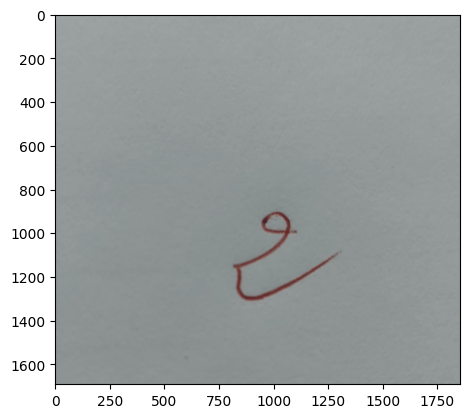

In [67]:
plt.imshow(image)

In [68]:
image.shape

(1692, 1855, 3)

In [69]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

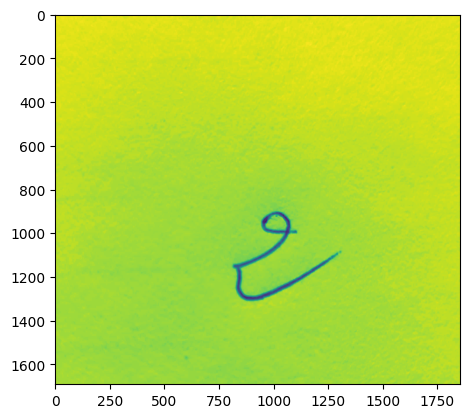

In [70]:
plt.imshow(image)

In [71]:
image.shape

(1692, 1855)

In [72]:
import numpy as np

In [73]:
def image_preprocess(pathforimage):
    image = cv2.imread(pathforimage, cv2.IMREAD_UNCHANGED)
    grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    threashold = 127
    _, binary = cv2.threshold(grayimage, threashold, 255, cv2.THRESH_BINARY)
    binary = cv2.resize(binary, (28,28))
    binary = binary.reshape(28,28,1)
    binary = np.expand_dims(binary, axis=0)
    
    return binary

SyntaxError: incomplete input (222300303.py, line 2)

In [ ]:
image2 = image_preprocess("2.jpeg")
image3 = image_preprocess("3.jpeg")

In [ ]:
image2.shape

(1, 28, 28, 1)

In [ ]:
tempoimage = image3[0, :, :, 0]

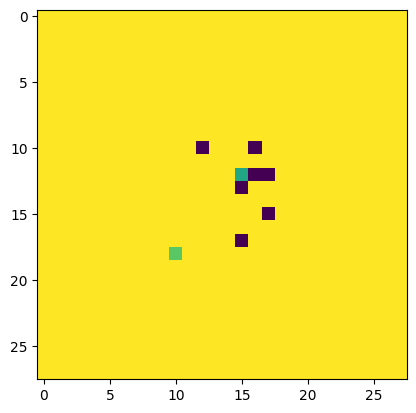

In [ ]:
plt.imshow(tempoimage)

In [ ]:
image33 = cv2.imread("3.png")


In [ ]:
image5 = cv2.imread("5.png")

In [106]:
import cv2
import numpy as np

def image_preprocessPNG(pathforimage):
    image = cv2.imread(pathforimage, cv2.IMREAD_UNCHANGED)

    if image.shape[-1] == 4:
        # Separate BGR and Alpha
        bgr = image[:, :, :3]
        alpha = image[:, :, 3] / 255.0

        # Create white background
        white_bg = np.ones_like(bgr, dtype=np.uint8) * 255

        # Alpha blending: image over white
        image = (bgr * alpha[..., None] + white_bg * (1 - alpha[..., None])).astype(np.uint8)

    # Convert to grayscale
    grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding with inversion (MNIST is white digit on black)
    _, binary = cv2.threshold(grayimage, 127, 255, cv2.THRESH_BINARY_INV)

    # Resize to 28x28
    binary = cv2.resize(binary, (28, 28))

    # Normalize pixel values to [0, 1]
    binary = binary.astype("float32") / 255.0

    # Expand dimensions to match (1, 28, 28, 1)
    binary = binary.reshape(1, 28, 28, 1)

    return binary


In [107]:
proc3 = image_preprocessPNG("3.png")

In [108]:
proc5 = image_preprocessPNG("5.png")

In [109]:
proc1 = image_preprocessPNG("1.jpeg")

In [120]:
proc1 = image_preprocessPNG("another.png")

In [110]:
proc3.shape

(1, 28, 28, 1)

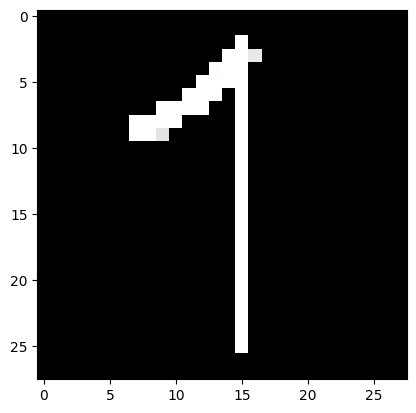

In [121]:
plt.imshow(proc1[0,:,:,0], cmap="gray")

In [ ]:
import tensorflow as tf

In [127]:
model = tf.keras.models.load_model("MNISTModel2.keras")

In [133]:
prediction = model.predict(proc3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [134]:

predicted_class_index = prediction.argmax(axis=1)[0]
print("Predicted class:", predicted_class_index)

Predicted class: 3


In [130]:
prediction

array([[1.02669844e-07, 9.32178795e-01, 6.75599665e-08, 4.18837702e-16,
        3.49265333e-15, 1.36224831e-09, 1.04589404e-08, 4.18947265e-03,
        6.86797375e-06, 6.36247098e-02]], dtype=float32)